In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_test = np.array(pd.read_csv("test.csv"))
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [4]:
x_test.shape = (-1, 28, 28)

In [5]:
x_test.shape

(28000, 28, 28)

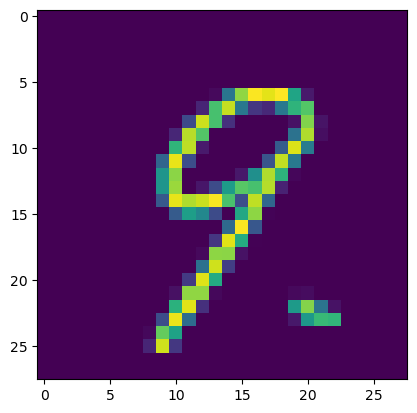

In [6]:
plt.imshow(x_test[2])

In [8]:
model = tf.keras.models.load_model("../Models/Model ex2ep CNN64")

In [10]:
data = pd.read_csv("train.csv")
y_train = np.array(data.label)
x_train = np.array(data.drop(["label"], axis=1))
x_train.shape = (-1, 28, 28)
y_train.shape = (-1, )
y_train = tf.keras.utils.to_categorical(y_train, 10)

In [11]:
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,64,2,validation_split = 0.25)

Epoch 1/2


2023-07-28 19:33:44.174252: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


493/493 [==============================] - 6s 11ms/step - loss: 42.5649 - accuracy: 0.9844 - val_loss: 8.3918 - val_accuracy: 0.9922
Epoch 2/2
493/493 [==============================] - 6s 12ms/step - loss: 5.3127 - accuracy: 0.9917 - val_loss: 4.7562 - val_accuracy: 0.9918


In [12]:
result = model.predict(x_test)
r = []
for i in result:
    r.append(np.argmax(i))
r

875/875 [==============================] - 2s 2ms/step


[2,
 0,
 9,
 0,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 9,
 9,
 2,
 3,
 5,
 4,
 1,
 8,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 9,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 8,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 3,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 7,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 3,
 6,
 4,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 5,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 3,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 8,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 3,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 5,


In [14]:
res_csv = pd.read_csv("sample_submission.csv")
res_csv.Label = r
res_csv.to_csv("result_kaggle.csv", index=False)